In [6]:
import matplotlib.pyplot as plt
import os
from datasets.dataset_utils import get_class_labels
import pandas as pd
JSON_DIR = "D:\JSON_stored\mbnetv2"
CSV_DIR_SLOWFAST = "D:\JSON_stored\slowfast"
LABEL_PATH = "../annotation_Jester/classInd_17_classes.txt"

MBNET_COLOR = (0,0,1)
SLOWFAST_COLOR = (1,0,0)
os.listdir(JSON_DIR)

['run-mobilenet_v2-tag-train_batch_loss.csv',
 'run-mobilenet_v2-tag-train_batch_loss.json',
 'run-mobilenet_v2-tag-train_batch_prec1.json',
 'run-mobilenet_v2-tag-train_epoch_loss.csv',
 'run-mobilenet_v2-tag-train_epoch_prec1.csv',
 'run-mobilenet_v2-tag-train_loss.csv',
 'run-mobilenet_v2-tag-train_loss.json',
 'run-mobilenet_v2-tag-train_prec1.json',
 'run-mobilenet_v2-tag-val_batch_loss.csv',
 'run-mobilenet_v2-tag-val_batch_loss.json',
 'run-mobilenet_v2-tag-val_batch_prec1.csv',
 'run-mobilenet_v2-tag-val_batch_prec1.json',
 'run-mobilenet_v2-tag-val_epoch_loss.csv',
 'run-mobilenet_v2-tag-val_epoch_loss.json',
 'run-mobilenet_v2-tag-val_epoch_prec1.csv',
 'run-mobilenet_v2-tag-val_epoch_prec1.json']

Plot train

In [14]:
import json


train_loss_1_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_loss.json')
with open(train_loss_1_path) as td1:
    train_loss_1 = json.load(td1)

train_loss_2_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_batch_loss.json')
with open(train_loss_2_path) as td2:
    train_loss_2 = json.load(td2)

train_loss = train_loss_1 + train_loss_2

In [15]:
import pandas as pd

def extract_steps_values(data):
    steps = data["Step"].values
    values = data["Value"].values

    return steps, values

def load_pd_dataframe(filename, model_name="mbnet"):
    if model_name is "mbnet":
        file_path = os.path.join(JSON_DIR, filename)
    else:
        file_path = os.path.join(CSV_DIR_SLOWFAST, filename)

    with open(file_path) as fd:
        frame = pd.read_csv(fd)
    return frame

def merge_frames(frame1, frame2):
    max_step = frame1["Step"].max()
    frame2_ext = frame2[frame2["Step"] > max_step]

    frame = frame1.append(frame2_ext)
    frame = frame.drop_duplicates(subset=["Step"])
    return frame

def plot_batch_loss(steps, loss_values, color=(0,0,1), save_name=None, legend=None):
    plt.title("Gubitak kroz mini grupe")
    plt.xlabel("Iteracija")
    plt.ylabel("Gubitak")
    plt.grid()
    plt.ylim([0, 3.2])

    plt.plot(steps, loss_values, color=color)
    if legend:
        plt.legend([legend])
    if save_name:
        plt.savefig(save_name)

def plot_epoch_loss(steps, loss_values, color=(0,0,1), save_name=None, legend=None):
    plt.title("Gubitak kroz epohe")
    plt.xlabel("Epoha")
    plt.ylabel("Gubitak")
    plt.grid()

    plt.plot(steps, loss_values, color=color)
    if legend:
        plt.legend([legend])
    if save_name:
        plt.savefig(save_name)

In [16]:
# due to a bug initial record of mbnetv2 training was stored in a separate file
train_loss_1_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_loss.csv')
with open(train_loss_1_path) as td1:
    train_loss_1 = pd.read_csv(train_loss_1_path)

train_loss_2_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_batch_loss.csv')
with open(train_loss_2_path) as td2:
    train_loss_2 = pd.read_csv(train_loss_2_path)

In [17]:
train_loss_2_ext = train_loss_2[train_loss_2["Step"] > 17854]
train_loss_2_ext


,Wall time,Step,Value
49,1.599781e+09,17904,0.872895
50,1.599781e+09,18004,0.835123
51,1.599781e+09,18104,0.908701
52,1.599781e+09,18154,0.978606
53,1.599781e+09,18254,0.927286
...,...,...,...
995,1.600067e+09,79079,0.517786
996,1.600067e+09,79129,0.938348
997,1.600067e+09,79179,0.355640
998,1.600067e+09,79229,0.372450


In [18]:
train_loss = merge_frames(train_loss_1, train_loss_2)
steps = train_loss["Step"].values
loss_values = train_loss["Value"].values

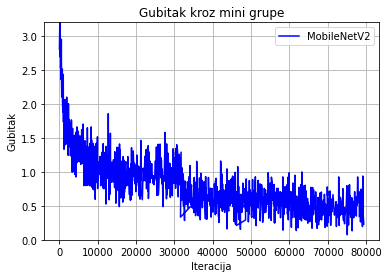

In [19]:
# plt.title("Gubitak kroz mini grupe")
# plt.xlabel("Iteracija")
# plt.ylabel("Gubitak")
# plt.grid()
# plt.plot(steps, loss_values, color=(0,0,1))
# plt.savefig()
plot_batch_loss(steps, loss_values, MBNET_COLOR, "BatchLossMBNetV2.png", "MobileNetV2")


Plot validation acc for mbnetv2 and slowfast

In [20]:
val_acc1 = load_pd_dataframe('run-mobilenet_v2-tag-val_batch_prec1.csv')
val_acc2 = load_pd_dataframe('run-mobilenet_v2-tag-val_epoch_prec1.csv')
val_acc_mbnet = merge_frames(val_acc1, val_acc2)
val_acc_slowfast = load_pd_dataframe('run-slow_fast_mobilenet_v2-tag-val_epoch_prec1.csv', "slowfast")
steps_mbnet, val_acc_mbnet_values = extract_steps_values(val_acc_mbnet)
steps_slowfast, val_acc_slowfast_values = extract_steps_values(val_acc_slowfast)

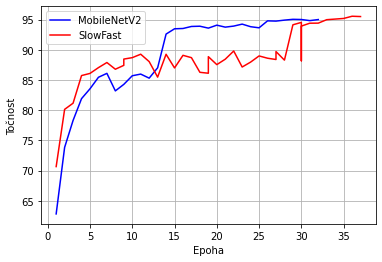

In [21]:
plt.ylabel("Točnost")
plt.xlabel("Epoha")

plt.plot(steps_mbnet, val_acc_mbnet_values, 'b', label="MobileNetV2")
plt.plot(steps_slowfast, val_acc_slowfast_values, 'r', label="SlowFast")
plt.legend()
plt.grid()

plt.savefig("PreciznostiMBNetEpohe.png")

Plot SlowFast train loss

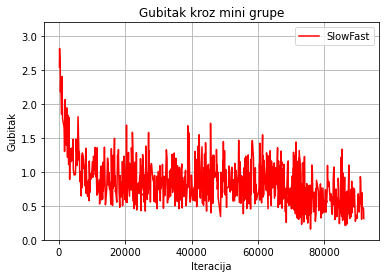

In [22]:
train_loss = load_pd_dataframe('run-slow_fast_mobilenet_v2-tag-train_batch_loss.csv', "slowfast")
steps, losess = extract_steps_values(train_loss)
plot_batch_loss(steps, losess, SLOWFAST_COLOR, "BatchLossSlowFast.png", "SlowFast")

Confusion matrix for MBNetV2

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

CSV_PATH = "test_results_mbnetv2.csv"
with open(CSV_PATH, "r") as fd:
    y_y_pred = pd.read_csv(fd)
y_y_pred = y_y_pred.dropna(axis=0)
y_true = y_y_pred["y_true"].values
y_pred = y_y_pred["y_predicted"].values
labels = get_class_labels(LABEL_PATH)
label_names = labels.values()
cm = confusion_matrix(y_true=y_true, y_pred=y_pred, normalize="true")

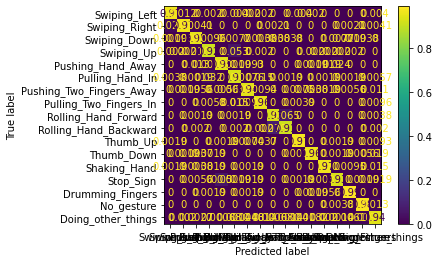

In [25]:
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=label_names)
display = display.plot()
plt.show()

In [9]:
from sklearn.metrics import classification_report

report_mbnetv2 = classification_report(y_true=y_true, y_pred=y_pred, target_names=label_names, digits=4, output_dict=True)
print(report_mbnetv2)

{'Swiping_Left': {'precision': 0.9676113360323887, 'recall': 0.9676113360323887, 'f1-score': 0.9676113360323887, 'support': 494}, 'Swiping_Right': {'precision': 0.9710743801652892, 'recall': 0.9670781893004116, 'f1-score': 0.9690721649484535, 'support': 486}, 'Swiping_Down': {'precision': 0.9357277882797732, 'recall': 0.9519230769230769, 'f1-score': 0.9437559580552907, 'support': 520}, 'Swiping_Up': {'precision': 0.9395161290322581, 'recall': 0.9173228346456693, 'f1-score': 0.9282868525896415, 'support': 508}, 'Pushing_Hand_Away': {'precision': 0.9408502772643254, 'recall': 0.9460966542750929, 'f1-score': 0.943466172381835, 'support': 538}, 'Pulling_Hand_In': {'precision': 0.9087523277467412, 'recall': 0.9277566539923955, 'f1-score': 0.918156161806209, 'support': 526}, 'Pushing_Two_Fingers_Away': {'precision': 0.9452830188679245, 'recall': 0.943502824858757, 'f1-score': 0.944392082940622, 'support': 531}, 'Pulling_Two_Fingers_In': {'precision': 0.9575289575289575, 'recall': 0.955684007

Precisions for slowfast

In [17]:
import pandas as pd

CSV_PATH = "test_results_slow_fast_mobilenetv2.csv"
with open(CSV_PATH, "r") as fd:
    y_y_pred = pd.read_csv(fd)
y_y_pred = y_y_pred.dropna(axis=0)
y_true = y_y_pred["y_true"].values
y_pred = y_y_pred["y_predicted"].values
class_labels = get_class_labels(LABEL_PATH)
label_names = labels.values()
report_slow_fast = classification_report(y_true=y_true, y_pred=y_pred, target_names=class_labels, digits=4, output_dict=True)
print(report_slow_fast)

{'Swiping_Left': {'precision': 0.9735772357723578, 'recall': 0.9696356275303644, 'f1-score': 0.9716024340770791, 'support': 494}, 'Swiping_Right': {'precision': 0.9634146341463414, 'recall': 0.9753086419753086, 'f1-score': 0.9693251533742332, 'support': 486}, 'Swiping_Down': {'precision': 0.9509803921568627, 'recall': 0.9326923076923077, 'f1-score': 0.9417475728155339, 'support': 520}, 'Swiping_Up': {'precision': 0.9321357285429142, 'recall': 0.9192913385826772, 'f1-score': 0.9256689791873142, 'support': 508}, 'Pushing_Hand_Away': {'precision': 0.9314079422382672, 'recall': 0.9591078066914498, 'f1-score': 0.9450549450549449, 'support': 538}, 'Pulling_Hand_In': {'precision': 0.9197761194029851, 'recall': 0.9372623574144486, 'f1-score': 0.928436911487759, 'support': 526}, 'Pushing_Two_Fingers_Away': {'precision': 0.9581749049429658, 'recall': 0.9491525423728814, 'f1-score': 0.9536423841059604, 'support': 531}, 'Pulling_Two_Fingers_In': {'precision': 0.9574468085106383, 'recall': 0.953757

Plot weighting function

In [ ]:
import numpy as np
x = np.linspace(0, 30)
y = 1/(1 + np.exp(-0.2 * (x-15//4)))

plt.xlabel("Korak")
plt.ylabel("Težina")
plt.grid()
plt.plot(x, y)
plt.savefig("WeightingFunction.png")

Plot column bars for precision and recall

ValueError: shape mismatch: objects cannot be broadcast to a single shape

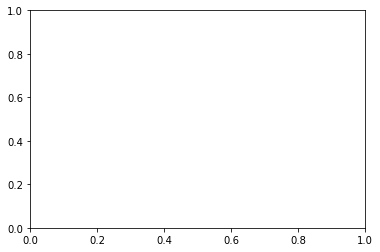

In [40]:
import numpy as np
import matplotlib.pyplot as plt
# precisions_mbnetv2 = report_mbnetv2[]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.barh(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [52]:
precisions_mbnet = []
recalls_mbnet = []
precisions_slowfast = []
recalls_slowfast = []
labels = []
print(report_mbnetv2["Swiping_Left"]["precision"])
print(report_mbnetv2.keys())
for label in report_mbnetv2.keys():
    if label not in label_names:
        continue
    values = report_mbnetv2[label]
    precisions_mbnet.append(values["precision"] * 100 - 90)
    recalls_mbnet.append(values["recall"] * 100 - 90)
    labels.append(label)

    values = report_slow_fast[label]
    precisions_slowfast.append(values["precision"] * 100 - 90)
    recalls_slowfast.append(values["recall"] * 100 - 90)

0.9676113360323887
dict_keys(['Swiping_Left', 'Swiping_Right', 'Swiping_Down', 'Swiping_Up', 'Pushing_Hand_Away', 'Pulling_Hand_In', 'Pushing_Two_Fingers_Away', 'Pulling_Two_Fingers_In', 'Rolling_Hand_Forward', 'Rolling_Hand_Backward', 'Thumb_Up', 'Thumb_Down', 'Shaking_Hand', 'Stop_Sign', 'Drumming_Fingers', 'No_gesture', 'Doing_other_things', 'accuracy', 'macro avg', 'weighted avg'])


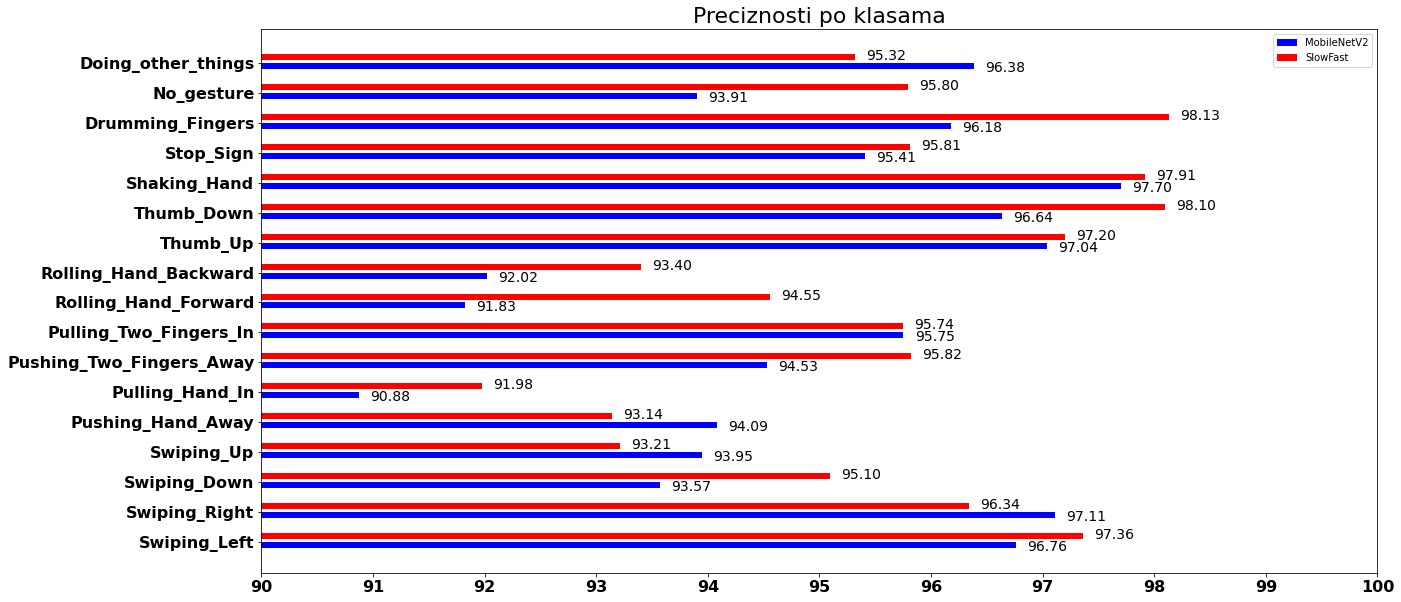

In [94]:
import numpy as np
indices = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Preciznosti po klasama", fontsize=22)
rect1 = ax.barh(indices, precisions_mbnet, height=0.2, label="MobileNetV2", color=MBNET_COLOR)
rect2 = ax.barh(indices + .3, precisions_slowfast, height=0.2, label="SlowFast", color=SLOWFAST_COLOR)
ax.legend(loc='upper right')
ax.set_yticks(indices + 0.2/2)
font_label = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
ax.set_yticklabels(labels, minor=False, fontdict=font_label)
# for i, c in zip(indices, labels):
#     ax.text(-.2, i, c)

values_font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}
for i, prec in enumerate(precisions_mbnet):
    ax.text(prec + 0.1, i - 0.2, "{:.2f}".format(prec + 90), fontdict=values_font)
for i, prec in enumerate(precisions_slowfast):
    ax.text(prec + 0.1, i + 0.2, "{:.2f}".format(prec + 90), fontdict=values_font)

x_ticks_locs = np.linspace(0, 10, 11)
ax.set_xticks(x_ticks_locs)
x_ticks = np.linspace(90, 100, 11)
x_ticks = np.round(x_ticks)
x_ticks = [str(int(x_tick)) for x_tick in x_ticks]
ax.set_xticklabels(x_ticks, minor=False,fontdict=font_label)
# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         width = rect.get_width()
#         ax.annotate('{}'.format(width),
#                     xy=(width, rect.get_y() + rect.get_height() / 2, height),
#                     xytext=(3, 0),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')
# autolabel(rect1)
# autolabel(rect2)
plt.savefig("BarHPrecision.png",bbox_inches='tight')
plt.show()

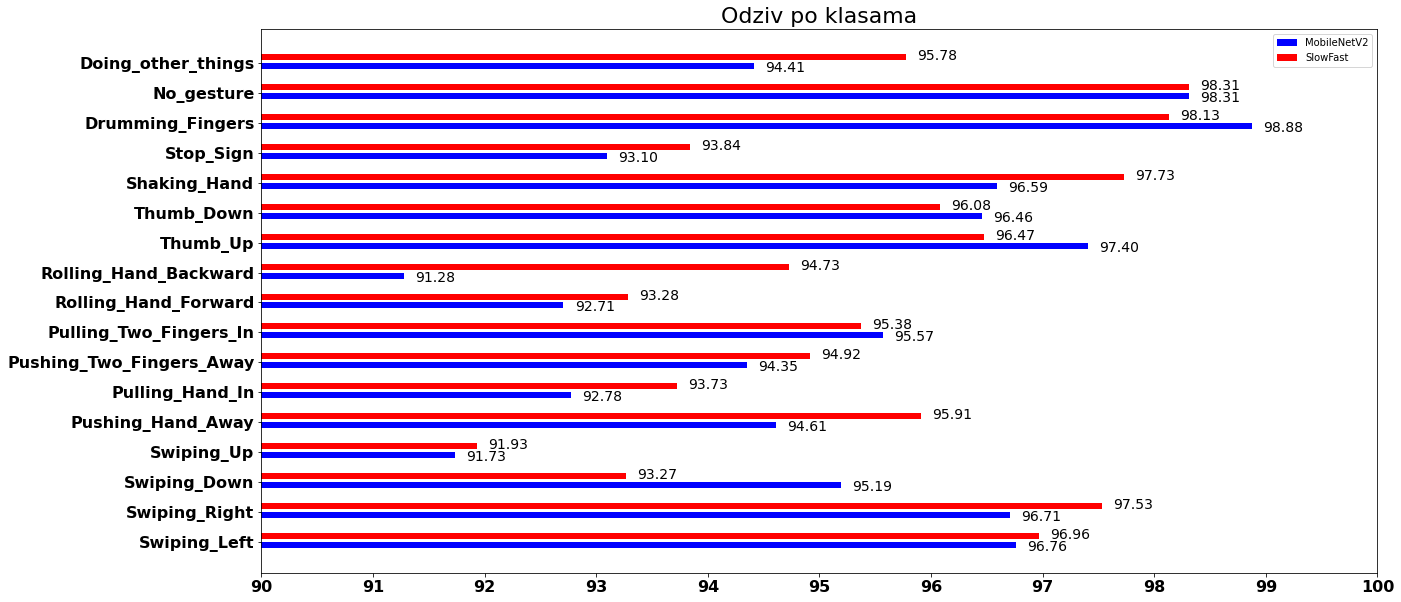

In [93]:
import numpy as np
indices = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Odziv po klasama", fontsize=22)
rect1 = ax.barh(indices, recalls_mbnet, height=0.2, label="MobileNetV2", color=MBNET_COLOR)
rect2 = ax.barh(indices + .3, recalls_slowfast, height=0.2, label="SlowFast", color=SLOWFAST_COLOR)
ax.legend(loc='upper right')
ax.set_yticks(indices + 0.2/2)
font_label = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
ax.set_yticklabels(labels, minor=False, fontdict=font_label)
# for i, c in zip(indices, labels):
#     ax.text(-.2, i, c)

values_font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}
for i, prec in enumerate(recalls_mbnet):
    ax.text(prec + 0.1, i - 0.2, "{:.2f}".format(prec + 90), fontdict=values_font)
for i, prec in enumerate(recalls_slowfast):
    ax.text(prec + 0.1, i + 0.2, "{:.2f}".format(prec + 90), fontdict=values_font)

x_ticks_locs = np.linspace(0, 10, 11)
ax.set_xticks(x_ticks_locs)
x_ticks = np.linspace(90, 100, 11)
x_ticks = np.round(x_ticks)
x_ticks = [str(int(x_tick)) for x_tick in x_ticks]
ax.set_xticklabels(x_ticks, minor=False,fontdict=font_label)

plt.savefig("BarHRecall.png",bbox_inches='tight')
plt.show()